In [1]:
graph = {
    (0, 0): [(0, 1), (1, 0)],
    (0, 1): [(0, 0), (0, 2), (1, 1)],
    (0, 2): [(0, 1), (1, 2)],
    (1, 0): [(0, 0), (1, 1), (2, 0)],
    (1, 1): [(0, 1), (1, 0), (1, 2), (2, 1)],
    (1, 2): [(0, 2), (1, 1), (2, 2)],
    (2, 0): [(1, 0), (2, 1)],
    (2, 1): [(1, 1), (2, 0), (2, 2)],
    (2, 2): [(1, 2), (2, 1)]
}
print(graph)

{(0, 0): [(0, 1), (1, 0)], (0, 1): [(0, 0), (0, 2), (1, 1)], (0, 2): [(0, 1), (1, 2)], (1, 0): [(0, 0), (1, 1), (2, 0)], (1, 1): [(0, 1), (1, 0), (1, 2), (2, 1)], (1, 2): [(0, 2), (1, 1), (2, 2)], (2, 0): [(1, 0), (2, 1)], (2, 1): [(1, 1), (2, 0), (2, 2)], (2, 2): [(1, 2), (2, 1)]}


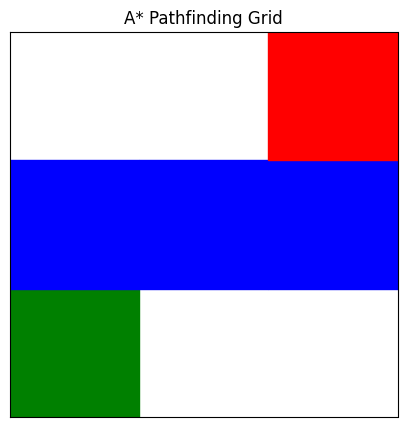

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define grid size
grid_size = (3, 3)  # 3x3 grid

# Define start and goal nodes
start = (0, 0)
goal = (2, 2)

# Example path found by A* (replace with actual path from A* algorithm)
path = [(0, 0), (1, 0), (1, 1), (1, 2), (2, 2)]  # Example path

# Create a blank grid
grid = np.zeros(grid_size)

# Plot the grid
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xticks(np.arange(grid_size[1] + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(grid_size[0] + 1) - 0.5, minor=True)
ax.grid(which="minor", color="black", linestyle="-", linewidth=2)
ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)

# Fill cells based on path
for y in range(grid_size[0]):
    for x in range(grid_size[1]):
        if (y, x) == start:
            ax.add_patch(plt.Rectangle((x - 0.5, y - 0.5), 1, 1, color="green"))  # Start
        elif (y, x) == goal:
            ax.add_patch(plt.Rectangle((x - 0.5, y - 0.5), 1, 1, color="red"))  # Goal
        elif (y, x) in path:
            ax.add_patch(plt.Rectangle((x - 0.5, y - 0.5), 1, 1, color="blue"))  # Path

plt.title("A* Pathfinding Grid")
plt.show()


In [13]:

import heapq
import math

class Astar:
    def __init__(self, nodes):
        self.nodes = nodes # Expecting dictionary {node1:[node2,node3], node2:[node4,node5]}

    def find_path(self, start, goal):
        # 1 : Empty priority Q
        Q = []
        
        # 2: Insert start node with wieght 0
        heapq.heappush(Q, (0, (start, self.nodes[start])) ) # (0, ((0,0), [(),()]))

        while True:
            # 3: Get heigh priority node
            curr = heapq.heappop(Q)
            curr = curr[1]
            print("Checking with curr = ", curr)

            # 4: Check if it is goal
            if curr[0] == goal:
                print("Hurray....")
                break

            # 5: Add his neighbours in Q
            print(f"curr = {curr}")
            for neighbour in curr[1]:
                print(f"neighbour = {neighbour}, goal = {goal}")
                distance = math.sqrt( (neighbour[0]-goal[0])**2 + (neighbour[1]-goal[1])**2 ) # diatance
                heapq.heappush(Q, (distance, (neighbour, self.nodes[neighbour])))


grid_size = (100, 100)  # 100x100 grid
graph = {}

for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        neighbors = []
        if x > 0: neighbors.append((x - 1, y))  # Left
        if x < grid_size[0] - 1: neighbors.append((x + 1, y))  # Right
        if y > 0: neighbors.append((x, y - 1))  # Up
        if y < grid_size[1] - 1: neighbors.append((x, y + 1))  # Down
        graph[(x, y)] = neighbors  # Store neighbors

start = (0, 0)  # Top-left
goal = (99, 99)  # Bottom-right

a = Astar(graph)
a.find_path(start, goal)

Checking with curr =  ((0, 0), [(1, 0), (0, 1)])
curr = ((0, 0), [(1, 0), (0, 1)])
neighbour = (1, 0), goal = (99, 99)
neighbour = (0, 1), goal = (99, 99)
Checking with curr =  ((0, 1), [(1, 1), (0, 0), (0, 2)])
curr = ((0, 1), [(1, 1), (0, 0), (0, 2)])
neighbour = (1, 1), goal = (99, 99)
neighbour = (0, 0), goal = (99, 99)
neighbour = (0, 2), goal = (99, 99)
Checking with curr =  ((1, 1), [(0, 1), (2, 1), (1, 0), (1, 2)])
curr = ((1, 1), [(0, 1), (2, 1), (1, 0), (1, 2)])
neighbour = (0, 1), goal = (99, 99)
neighbour = (2, 1), goal = (99, 99)
neighbour = (1, 0), goal = (99, 99)
neighbour = (1, 2), goal = (99, 99)
Checking with curr =  ((1, 2), [(0, 2), (2, 2), (1, 1), (1, 3)])
curr = ((1, 2), [(0, 2), (2, 2), (1, 1), (1, 3)])
neighbour = (0, 2), goal = (99, 99)
neighbour = (2, 2), goal = (99, 99)
neighbour = (1, 1), goal = (99, 99)
neighbour = (1, 3), goal = (99, 99)
Checking with curr =  ((2, 2), [(1, 2), (3, 2), (2, 1), (2, 3)])
curr = ((2, 2), [(1, 2), (3, 2), (2, 1), (2, 3)])
neigh